### Load tensorflow

In [168]:
import tensorflow as tf

### Collect Data

In [169]:
(trainX, trainY),(testX, testY) = tf.keras.datasets.mnist.load_data()

In [170]:
trainX.shape

(60000, 28, 28)

In [171]:
testX.shape

(10000, 28, 28)

In [172]:
testY[0]

7

### Convert Output label to multiple values

In [173]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [174]:
testY[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

## Build the Graph

In [175]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

## Build the Graph...

In [176]:
#Add 1st hidden layer
model.add(tf.keras.layers.Dense(200, activation='relu'))

In [177]:
#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation='relu'))

In [178]:
#Add 3rd hidden layer
model.add(tf.keras.layers.Dense(60, activation='relu'))

In [179]:
#Add 4th hidden layer
model.add(tf.keras.layers.Dense(30, activation='relu'))

In [180]:
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

## Build the Graph...

In [181]:
#Compile the model
sgd_op = tf.keras.optimizers.SGD(lr=0.1,decay=0.01)
model.compile(optimizer=sgd_op, loss='categorical_crossentropy', 
              metrics=['accuracy'])

## Review model

In [182]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_10 (Reshape)         (None, 784)               0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 784)               3136      
_________________________________________________________________
dense_50 (Dense)             (None, 200)               157000    
_________________________________________________________________
dense_51 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_52 (Dense)             (None, 60)                6060      
_________________________________________________________________
dense_53 (Dense)             (None, 30)                1830      
_________________________________________________________________
dense_54 (Dense)             (None, 10)              

## Train the model

In [185]:
model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=10,
          batch_size=32)

Epoch 1/180000
1/1 [==============================] - 0s 160ms/step - loss: 0.1698 - accuracy: 0.9614 - val_loss: 0.2889 - val_accuracy: 0.9567
Epoch 2/180000
1/1 [==============================] - 0s 110ms/step - loss: 0.1698 - accuracy: 0.9614 - val_loss: 0.2700 - val_accuracy: 0.9567
Epoch 3/180000
1/1 [==============================] - 0s 103ms/step - loss: 0.1697 - accuracy: 0.9614 - val_loss: 0.2600 - val_accuracy: 0.9567
Epoch 4/180000
1/1 [==============================] - 0s 111ms/step - loss: 0.1696 - accuracy: 0.9614 - val_loss: 0.2532 - val_accuracy: 0.9568
Epoch 5/180000
1/1 [==============================] - 0s 90ms/step - loss: 0.1695 - accuracy: 0.9614 - val_loss: 0.2479 - val_accuracy: 0.9568
Epoch 6/180000
1/1 [==============================] - 0s 97ms/step - loss: 0.1694 - accuracy: 0.9614 - val_loss: 0.2436 - val_accuracy: 0.9568
Epoch 7/180000
1/1 [==============================] - 0s 100ms/step - loss: 0.1694 - accuracy: 0.9614 - val_loss: 0.2400 - val_accuracy: 0

KeyboardInterrupt: ignored

In [ ]:
model.save('mnist_dnn_v1.h5')

In [ ]:
!ls -l

In [ ]:
testX[1:2].shape

In [ ]:
pred = model.predict(testX[1:2])
pred

array([[1.2755513e-21, 6.6647230e-21, 1.0000000e+00, 1.4944920e-16,
        9.1949099e-24, 1.3031776e-21, 1.9600905e-19, 6.1061905e-23,
        2.8917394e-17, 8.4639304e-17]], dtype=float32)

In [ ]:
import numpy as np

In [ ]:
np.argmax(pred[0])

2

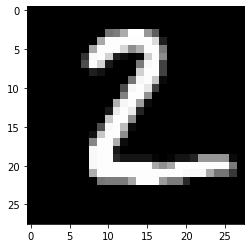

In [ ]:
#Lets print the image as well
import matplotlib.pyplot as plt

plt.imshow(testX[1],cmap='gray')

In [ ]:
testY[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)